# Student Dropout Prediction
## Noah Khan

In [1]:
import pandas as pd
import numpy as np

### Load Dataset
Choose one of the methods to load the dataset. You don't need to run both methods.
#### From a directory

In [2]:
# load the dataset
studentsData = pd.read_csv('data.csv', sep=';')

#### From UCI Machine Learning Repository Library

UCI Machine Learning Repository has a library that will allow to load the dataset without downloading the dataset from the website.

In [ ]:
########code from the UCI Machine Learning Repository to load dataset##############
pip install ucimlrepo
from ucimlrepo import fetch_ucirepo 
studentsData = fetch_ucirepo(id=697) 
predictors = studentsData.data.features
response = studentsData.data.targets
####################################################################################

# combine to form one dataframe
studentsData = pd.concat([predictors, response], axis = 1)

### Expolaritory Analysis

In [3]:
# preview the structure of the dataset
studentsData.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [4]:
studentsData.describe()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,...,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000
mean,1.178571,18.669078,1.727848,8856.642631,0.890823,4.577758,132.613314,1.873192,19.561935,22.275316,...,0.137658,0.541817,6.232143,8.063291,4.435805,10.230206,0.150316,11.566139,1.228029,0.001969
std,0.605747,17.484682,1.313793,2063.566416,0.311897,10.216592,13.188332,6.914514,15.603186,15.343108,...,0.690880,1.918546,2.195951,3.947951,3.014764,5.210808,0.753774,2.663850,1.382711,2.269935
min,1.000000,1.000000,0.000000,33.000000,0.000000,1.000000,95.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000
25%,1.000000,1.000000,1.000000,9085.000000,1.000000,1.000000,125.000000,1.000000,2.000000,3.000000,...,0.000000,0.000000,5.000000,6.000000,2.000000,10.750000,0.000000,9.400000,0.300000,-1.700000
50%,1.000000,17.000000,1.000000,9238.000000,1.000000,1.000000,133.100000,1.000000,19.000000,19.000000,...,0.000000,0.000000,6.000000,8.000000,5.000000,12.200000,0.000000,11.100000,1.400000,0.320000
75%,1.000000,39.000000,2.000000,9556.000000,1.000000,1.000000,140.000000,1.000000,37.000000,37.000000,...,0.000000,0.000000,7.000000,10.000000,6.000000,13.333333,0.000000,13.900000,2.600000,1.790000
max,6.000000,57.000000,9.000000,9991.000000,1.000000,43.000000,190.000000,109.000000,44.000000,44.000000,...,12.000000,19.000000,23.000000,33.000000,20.000000,18.571429,12.000000,16.200000,3.700000,3.510000


In [5]:
# check for missing data
studentsData.isnull().sum()

Marital status                                    0
Application mode                                  0
Application order                                 0
Course                                            0
Daytime/evening attendance\t                      0
Previous qualification                            0
Previous qualification (grade)                    0
Nacionality                                       0
Mother's qualification                            0
Father's qualification                            0
Mother's occupation                               0
Father's occupation                               0
Admission grade                                   0
Displaced                                         0
Educational special needs                         0
Debtor                                            0
Tuition fees up to date                           0
Gender                                            0
Scholarship holder                                0
Age at enrol

In [6]:
# examine the attributes of the variables
studentsData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance	                     4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Previous qualification (grade)                  4424 non-null   float64
 7   Nacionality                                     4424 non-null   int64  
 8   Mother's qualification                          4424 non-null   int64  
 9   Father's qualification                   

In [7]:
## examine the response variable
studentsData['Target'].value_counts()

Graduate    2209
Dropout     1421
Enrolled     794
Name: Target, dtype: int64

##### Adjust the Response Varaible

The response variable will be whether a student has dropped out or not. 

In [8]:
studentsData.rename(columns = {'Target':'Dropped_Out'}, inplace = True)
studentsData['Dropped_Out'].replace({'Graduate':0, 'Dropout':1, 'Enrolled':0}, inplace = True)

##### Overview of Student Dropout

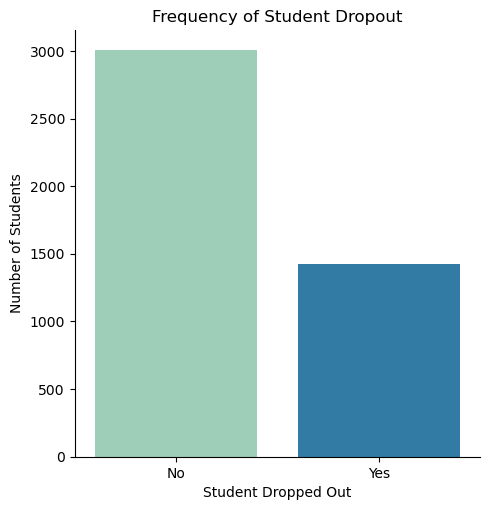

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_palette('YlGnBu', 2)
responsePlot = sns.catplot(data = studentsData, x = "Dropped_Out", kind = "count")
plt.title("Frequency of Student Dropout")
plt.ylabel("Number of Students")
plt.xlabel("Student Dropped Out")
responsePlot.set(xticklabels = ['No', 'Yes'])
plt.show(responsePlot)

#### Rename Predictors

In [10]:
## the course variable is a categorical variable for the academic path
studentsData.rename(columns = {'Course':'Academic_Path'}, inplace = True)

## marital staus
studentsData.rename(columns = {'Marital status':'Marital_Status'}, inplace = True)

## nationality is spelled wrong
studentsData.rename(columns = {'Nacionality':'Nationality'}, inplace = True)

## daytime variable has an escape key
studentsData.rename(columns = {'Daytime/evening attendance\t':'Daytime_Attendance'}, inplace = True)

## application mode
studentsData.rename(columns = {'Application mode':'Application_Type'}, inplace = True)

## application order
studentsData.rename(columns = {'Application order':'Application_Order'}, inplace = True)

## application mode
studentsData.rename(columns = {'Application mode':'Application Type'}, inplace = True)

## previous qualification
studentsData.rename(columns = {'Previous qualification':'Previous_Qualification'}, inplace = True)

## previous qualification grade
studentsData.rename(columns = {'Previous qualification (grade)':'Previous_Qualification_(Grade)'}, inplace = True)

## addmission grade
studentsData.rename(columns = {'Admission grade':'Admission_Grade'}, inplace = True)

## Educational special needs
studentsData.rename(columns = {'Educational special needs':'Special_Needs'}, inplace = True)

## Tuition fees up to date
studentsData.rename(columns = {'Tuition fees up to date':'Tuition_Current'}, inplace = True)

## Scholarship holder
studentsData.rename(columns = {'Scholarship holder':'Scholarship_Holder'}, inplace = True)

## Age at enrollment
studentsData.rename(columns = {'Age at enrollment':'Age_At_Enrollment'}, inplace = True)

## Curricular units 1st sem (credited)
studentsData.rename(columns = {'Curricular units 1st sem (credited)':'1st_Sem_Units_Credited'}, inplace = True)

## Curricular units 1st sem (enrolled)
studentsData.rename(columns = {'Curricular units 1st sem (enrolled)':'1st_Sem_Units_Enrolled'}, inplace = True)

## Curricular units 1st sem (evaluations)
studentsData.rename(columns = {'Curricular units 1st sem (evaluations)':'1st_Sem_Units_Evaluations'}, inplace = True)

## Curricular units 1st sem (approved)
studentsData.rename(columns = {'Curricular units 1st sem (approved)':'1st_Sem_Units_Approved'}, inplace = True)

## Curricular units 1st sem (grade)
studentsData.rename(columns = {'Curricular units 1st sem (grade)':'1st_Sem_Units_Grade'}, inplace = True)

## Curricular units 1st sem (without evaluations)
studentsData.rename(columns = {'Curricular units 1st sem (without evaluations)':'1st_Sem_Units_Without_Evaluations'}, inplace = True)

## Curricular units 2nd sem (credited)
studentsData.rename(columns = {'Curricular units 2nd sem (credited)':'2nd_Sem_Units_Credited'}, inplace = True)

## Curricular units 2nd sem (enrolled)
studentsData.rename(columns = {'Curricular units 2nd sem (enrolled)':'2nd_Sem_Units_Enrolled'}, inplace = True)

## Curricular units 2nd sem (evaluations)
studentsData.rename(columns = {'Curricular units 2nd sem (evaluations)':'2nd_Sem_Units_Evaluations'}, inplace = True)

## Curricular units 2nd sem (approved)
studentsData.rename(columns = {'Curricular units 2nd sem (approved)':'2nd_Sem_Units_Approved'}, inplace = True)

## Curricular units 2nd sem (grade)
studentsData.rename(columns = {'Curricular units 2nd sem (grade)':'2nd_Sem_Units_Grade'}, inplace = True)

## Curricular units 2nd sem (without evaluations)
studentsData.rename(columns = {'Curricular units 2nd sem (without evaluations)':'2nd_Sem_Units_Without_Evaluations'}, inplace = True)

## Unemployment rate
studentsData.rename(columns = {'Unemployment rate':'Unemployment_Rate'}, inplace = True)

## Inflation rate
studentsData.rename(columns = {'Inflation rate':'Inflation_Rate'}, inplace = True)

#### Drop Unneessary Predictors
The mother/father occupation and qualification will be dropped as it is extra information and consist of multiple values. There are also unknown values and the mother and father variables may not be appliciable for new data to predict. Also, the international predictor will not be needed.

In [11]:
studentsData.drop(['Mother\'s occupation', 'Father\'s occupation', 'Mother\'s qualification', 'Father\'s qualification', 'International'], axis = 1, inplace = True)

#### Define Categorical Variable Values

In [12]:
# define categorical variable values that don't have a consistant numbering system

## define marital status
studentsData['Marital_Status'].replace({1:'single', 2:'married', 3:'widower', 4:'divorced', 5:'facto union', 6:'legally separated'}, inplace = True)

## define the previous qualification
studentsData['Previous_Qualification'].replace({1:'Secondary education', 2:'Bachelor\'s degree', 3:'Higher education - degree', 4:'Master\'s', 5:'Doctorate',
                                                6:'Frequency of higher education', 9:'12th year of schooling - not completed', 10:'11th year of schooling - not completed',
                                                12:'Other - 11th year of schooling',14:'10th year of schooling',15:'10th year of schooling - not completed',
                                                19:'Basic education 3rd cycle (9th/10th/11th year) or equiv.', 38:'Basic education 2nd cycle (6th/7th/8th year) or equiv.',
                                                39:'Technological specialization course', 40:'Higher education - degree (1st cycle)',
                                                42:'Professional higher technical course', 43:'Higher education - master (2nd cycle)'}, inplace = True)

## replace the path id with the academic path names
### there is no need to make an evening program it's own program. We more interested in the academic subject and daytime/evening attending is it's own predictor
studentsData['Academic_Path'].replace({33:'Biofuel Production Technologies', 171:'Animation and Multimedia Design', 8014:'Social Service',
                                    9003:'Agronomy', 9070:'Communication Design', 9085:'Veterinary Nursing', 9119:'Informatics Engineering',
                                    9130:'Equinculture', 9147:'Management', 9238:'Social Service', 9254:'Tourism', 9500:'Nursing', 9556:'Oral Hygiene',
                                    9670:'Advertising and Marketing Management', 9773:'Journalism and Communication', 9853:'Basic Education',
                                    9991:'Management'}, inplace = True)

# define the nationaility of the students
studentsData['Nationality'].replace({1:'Portuguese', 2:'German', 6 :'Spanish', 11:'Italian', 13:'Dutch',14:'English', 17:'Lithuanian', 21:'Angolan', 22:'Cape Verdean',
                                     24:'Guinean', 25:'Mozambican', 26:'Santomean', 32:'Turkish', 41:'Brazilian', 62:'Romanian', 100:'Moldova (Republic of)',
                                     101:'Mexican', 103:'Ukrainian', 105:'Russian', 108:'Cuban', 109:'Colombian'}, inplace = True)
    
# define application type
studentsData['Application_Type'].replace({1:'1st phase - general contingent', 2:'Ordinance No. 612/93', 5:'1st phase - special contingent (Azores Island)',
                                          7:'Holders of other higher courses', 10:'Ordinance No. 854-B/99', 15:'International student (bachelor)',
                                          16:'1st phase - special contingent (Madeira Island)', 17:'2nd phase - general contingent', 18:'3rd phase - general contingent',
                                          26:'Ordinance No. 533-A/99, item b2) (Different Plan)', 27:'Ordinance No. 533-A/99, item b3 (Other Institution)',
                                          39:'Over 23 years old', 42:'Transfer', 43:'Change of course', 44:'Technological specialization diploma holders',
                                          51:'Change of institution/course', 53:'Short cycle diploma holders',
                                          57:'Change of institution/course (International)'}, inplace = True)

# define gender
studentsData['Gender'].replace({1:'Male', 0:"Female"}, inplace = True)    

#### Inspect Categorical Variables

Some of the categorical variables have a large amount of possible values. Therefore, common values will be consolidated.

In [13]:
studentsData['Marital_Status'].value_counts().sort_index()

divorced               91
facto union            25
legally separated       6
married               379
single               3919
widower                 4
Name: Marital_Status, dtype: int64

In [14]:
studentsData['Application_Type'].value_counts().sort_index()

1st phase - general contingent                         1708
1st phase - special contingent (Azores Island)           16
1st phase - special contingent (Madeira Island)          38
2nd phase - general contingent                          872
3rd phase - general contingent                          124
Change of course                                        312
Change of institution/course                             59
Change of institution/course (International)              1
Holders of other higher courses                         139
International student (bachelor)                         30
Ordinance No. 533-A/99, item b2) (Different Plan)         1
Ordinance No. 533-A/99, item b3 (Other Institution)       1
Ordinance No. 612/93                                      3
Ordinance No. 854-B/99                                   10
Over 23 years old                                       785
Short cycle diploma holders                              35
Technological specialization diploma hol

In [15]:
# consolidate values
studentsData['Application_Type'].replace(['1st phase - general contingent', '1st phase - special contingent (Azores Island)',
                                          '1st phase - special contingent (Madeira Island)'], '1st Phase', inplace=True)
studentsData['Application_Type'].replace(['Change of course', 'Change of institution/course', 'Change of institution/course (International)'],
                                         'Change of course and/or institution', inplace=True)
studentsData['Application_Type'].replace(['Ordinance No. 533-A/99, item b2) (Different Plan)', 'Ordinance No. 533-A/99, item b3 (Other Institution)',
                                          'Ordinance No. 612/93', 'Ordinance No. 854-B/99'], 'Other', inplace=True)
studentsData['Application_Type'].replace(['Short cycle diploma holders', 'Technological specialization diploma holders'], 'Diploma Holder', inplace=True)

In [16]:
studentsData['Application_Type'].value_counts().sort_index()

1st Phase                              1762
2nd phase - general contingent          872
3rd phase - general contingent          124
Change of course and/or institution     372
Diploma Holder                          248
Holders of other higher courses         139
International student (bachelor)         30
Other                                    15
Over 23 years old                       785
Transfer                                 77
Name: Application_Type, dtype: int64

In [17]:
studentsData['Application_Order'].value_counts().sort_index()

0       1
1    3026
2     547
3     309
4     249
5     154
6     137
9       1
Name: Application_Order, dtype: int64

In [18]:
## application order
studentsData['Application_Order'].replace({0:'First Choice', 1:'Second Choice', 2:'Third Choice', 9:'Last Choice'}, inplace= True)
studentsData['Application_Order'].replace([3, 4, 5, 6], 'Other', inplace=True)

In [19]:
studentsData['Application_Order'].value_counts().sort_index()

First Choice        1
Last Choice         1
Other             849
Second Choice    3026
Third Choice      547
Name: Application_Order, dtype: int64

In [20]:
studentsData['Academic_Path'].value_counts().sort_index()

Advertising and Marketing Management    268
Agronomy                                210
Animation and Multimedia Design         215
Basic Education                         192
Biofuel Production Technologies          12
Communication Design                    226
Equinculture                            141
Informatics Engineering                 170
Journalism and Communication            331
Management                              648
Nursing                                 766
Oral Hygiene                             86
Social Service                          570
Tourism                                 252
Veterinary Nursing                      337
Name: Academic_Path, dtype: int64

In [21]:
studentsData['Daytime_Attendance'].value_counts().sort_index()

0     483
1    3941
Name: Daytime_Attendance, dtype: int64

In [22]:
studentsData['Previous_Qualification'].value_counts().sort_index()

10th year of schooling                                         1
10th year of schooling - not completed                         2
11th year of schooling - not completed                         4
12th year of schooling - not completed                        11
Bachelor's degree                                             23
Basic education 2nd cycle (6th/7th/8th year) or equiv.         7
Basic education 3rd cycle (9th/10th/11th year) or equiv.     162
Doctorate                                                      1
Frequency of higher education                                 16
Higher education - degree                                    126
Higher education - degree (1st cycle)                         40
Higher education - master (2nd cycle)                          6
Master's                                                       8
Other - 11th year of schooling                                45
Professional higher technical course                          36
Secondary education      

In [23]:
# consolidate values
studentsData['Previous_Qualification'].replace(['10th year of schooling', '10th year of schooling - not completed',
                    '11th year of schooling - not completed', '12th year of schooling - not completed', 'Basic education 2nd cycle (6th/7th/8th year) or equiv.',
                    'Basic education 3rd cycle (9th/10th/11th year) or equiv.', 'Other - 11th year of schooling'], 'Below Secondary', inplace=True)
studentsData['Previous_Qualification'].value_counts().sort_index()

Bachelor's degree                          23
Below Secondary                           232
Doctorate                                   1
Frequency of higher education              16
Higher education - degree                 126
Higher education - degree (1st cycle)      40
Higher education - master (2nd cycle)       6
Master's                                    8
Professional higher technical course       36
Secondary education                      3717
Technological specialization course       219
Name: Previous_Qualification, dtype: int64

In [24]:
studentsData['Nationality'].value_counts().sort_index()

Angolan                     2
Brazilian                  38
Cape Verdean               13
Colombian                   1
Cuban                       1
Dutch                       1
English                     1
German                      2
Guinean                     5
Italian                     3
Lithuanian                  1
Mexican                     2
Moldova (Republic of)       3
Mozambican                  2
Portuguese               4314
Romanian                    2
Russian                     2
Santomean                  14
Spanish                    13
Turkish                     1
Ukrainian                   3
Name: Nationality, dtype: int64

In [25]:
studentsData.loc[studentsData['Nationality'] != 'Portuguese', 'Nationality'] = 'Other'

In [26]:
studentsData['Nationality'].value_counts().sort_index()

Other          110
Portuguese    4314
Name: Nationality, dtype: int64

### Visualizations of Predictors

#### Quantitative Predictors

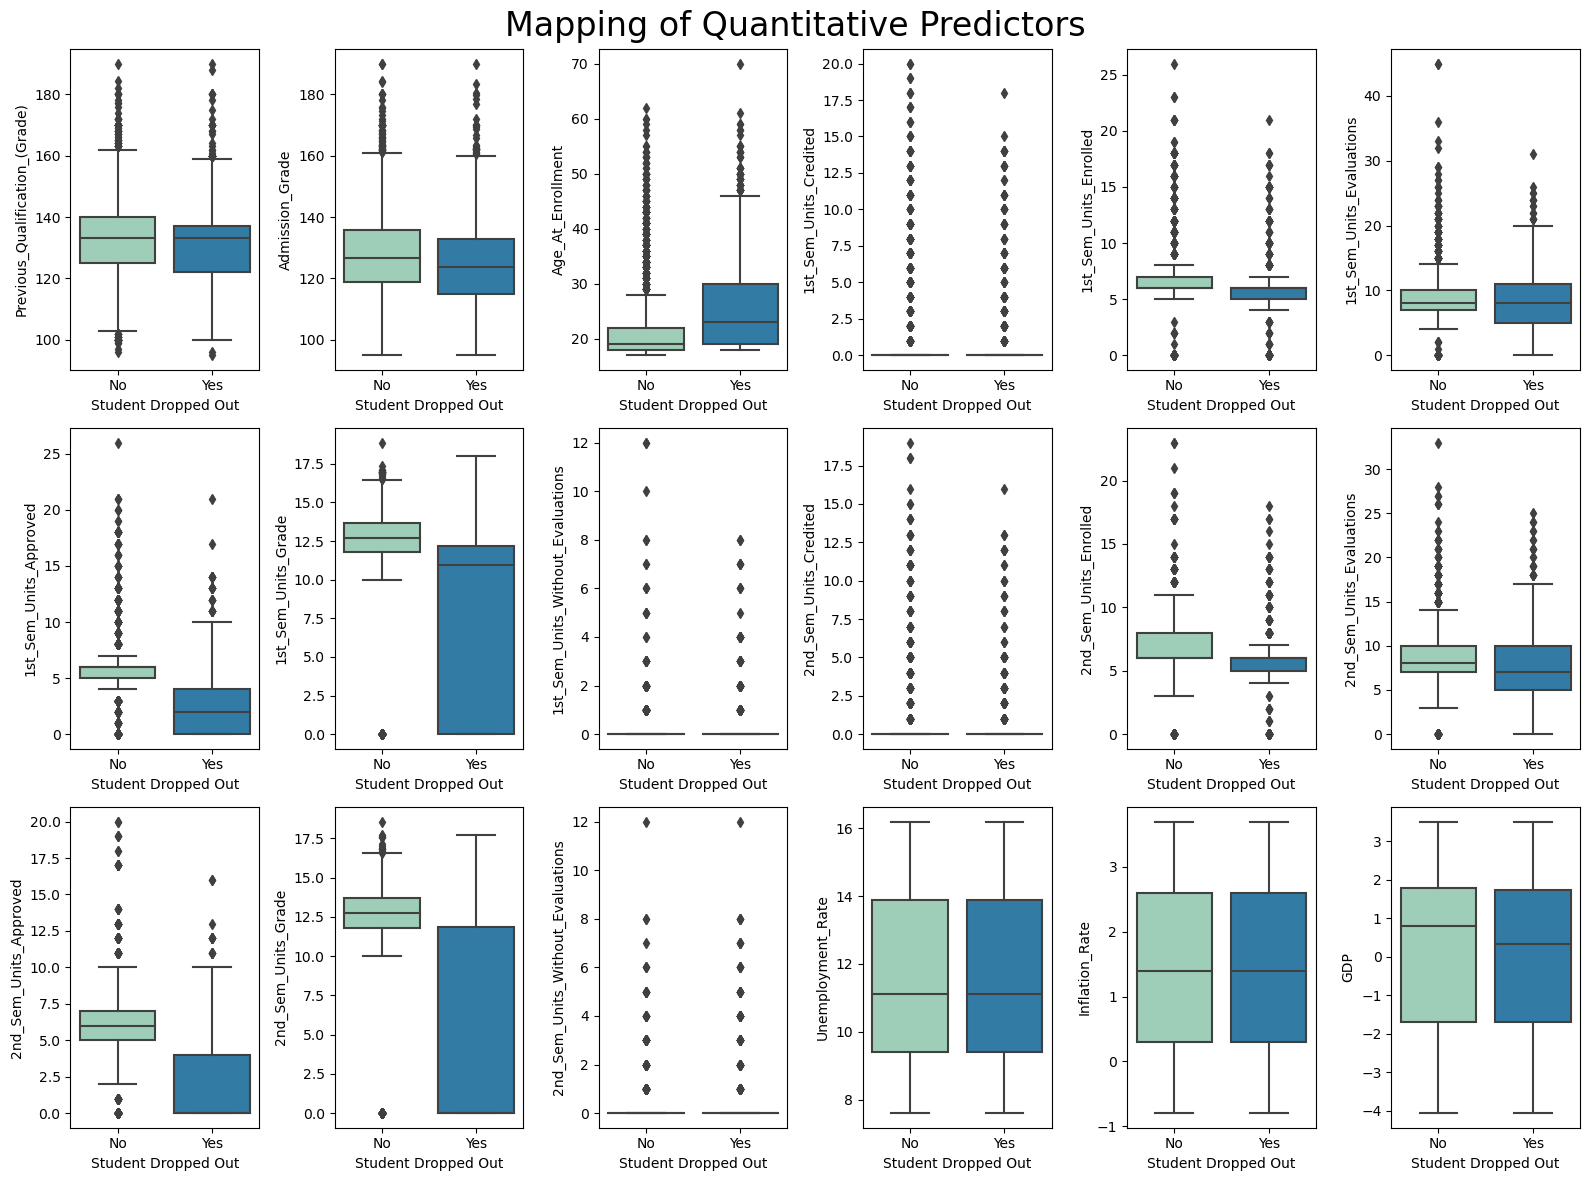

In [27]:
# plot boxplots of quantitative predictors
fig, axes = plt.subplots(3, 6, figsize = (16, 12))


sns.boxplot(data = studentsData, x = 'Dropped_Out', y = 'Previous_Qualification_(Grade)', ax = axes[0,0]).set(xticklabels = ['No', 'Yes'])
sns.boxplot(data = studentsData, x = 'Dropped_Out', y = 'Admission_Grade', ax = axes[0,1]).set(xticklabels = ['No', 'Yes'])
sns.boxplot(data = studentsData, x = 'Dropped_Out', y = 'Age_At_Enrollment', ax = axes[0,2]).set(xticklabels = ['No', 'Yes'])
sns.boxplot(data = studentsData, x = 'Dropped_Out', y = '1st_Sem_Units_Credited', ax = axes[0,3]).set(xticklabels = ['No', 'Yes'])
sns.boxplot(data = studentsData, x = 'Dropped_Out', y = '1st_Sem_Units_Enrolled', ax = axes[0,4]).set(xticklabels = ['No', 'Yes'])
sns.boxplot(data = studentsData, x = 'Dropped_Out', y = '1st_Sem_Units_Evaluations', ax = axes[0,5]).set(xticklabels = ['No', 'Yes'])
sns.boxplot(data = studentsData, x = 'Dropped_Out', y = '1st_Sem_Units_Approved', ax = axes[1,0]).set(xticklabels = ['No', 'Yes'])
sns.boxplot(data = studentsData, x = 'Dropped_Out', y = '1st_Sem_Units_Grade', ax = axes[1,1]).set(xticklabels = ['No', 'Yes'])
sns.boxplot(data = studentsData, x = 'Dropped_Out', y = '1st_Sem_Units_Without_Evaluations', ax = axes[1,2]).set(xticklabels = ['No', 'Yes'])
sns.boxplot(data = studentsData, x = 'Dropped_Out', y = '2nd_Sem_Units_Credited', ax = axes[1,3]).set(xticklabels = ['No', 'Yes'])
sns.boxplot(data = studentsData, x = 'Dropped_Out', y = '2nd_Sem_Units_Enrolled', ax = axes[1,4]).set(xticklabels = ['No', 'Yes'])
sns.boxplot(data = studentsData, x = 'Dropped_Out', y = '2nd_Sem_Units_Evaluations', ax = axes[1,5]).set(xticklabels = ['No', 'Yes'])
sns.boxplot(data = studentsData, x = 'Dropped_Out', y = '2nd_Sem_Units_Approved', ax = axes[2,0]).set(xticklabels = ['No', 'Yes'])
sns.boxplot(data = studentsData, x = 'Dropped_Out', y = '2nd_Sem_Units_Grade', ax = axes[2,1]).set(xticklabels = ['No', 'Yes'])
sns.boxplot(data = studentsData, x = 'Dropped_Out', y = '2nd_Sem_Units_Without_Evaluations', ax = axes[2,2]).set(xticklabels = ['No', 'Yes'])
sns.boxplot(data = studentsData, x = 'Dropped_Out', y = 'Unemployment_Rate', ax = axes[2,3]).set(xticklabels = ['No', 'Yes'])
sns.boxplot(data = studentsData, x = 'Dropped_Out', y = 'Inflation_Rate', ax = axes[2,4]).set(xticklabels = ['No', 'Yes'])
sns.boxplot(data = studentsData, x = 'Dropped_Out', y = 'GDP', ax = axes[2,5]).set(xticklabels = ['No', 'Yes'])

for index in range(-3, 0):
    plt.setp(axes[index, :], xlabel = "Student Dropped Out")

fig.suptitle("Mapping of Quantitative Predictors", fontsize = 24)
fig.tight_layout()
plt.show()

We can first observe from the visualization that the unemployment rate and inflation rate does not have an impact on students dropping out as the results are the same. The biggest factor that contributes to a student dropping out is the student's academic performance. Lastly, a key factor determining if a student drops out is the age of the student at enrollment.

#### Qualitative Predictors

In [28]:
# create dataframes for each qualitative predictor and group the data by each value and get student count for each outcome
maritalStatus = studentsData.groupby(["Dropped_Out", "Marital_Status"]).size().unstack()
applicationType = studentsData.groupby(["Dropped_Out", "Application_Type"]).size().unstack()
applicationOrder = studentsData.groupby(["Dropped_Out", "Application_Order"]).size().unstack()
academicPath = studentsData.groupby(["Dropped_Out", "Academic_Path"]).size().unstack()
daytimeAttendance = studentsData.groupby(["Dropped_Out", "Daytime_Attendance"]).size().unstack()
previousQualification = studentsData.groupby(["Dropped_Out", "Previous_Qualification"]).size().unstack()
nationality = studentsData.groupby(["Dropped_Out", "Nationality"]).size().unstack()
displaced = studentsData.groupby(["Dropped_Out", "Displaced"]).size().unstack()
specialNeeds = studentsData.groupby(["Dropped_Out", "Special_Needs"]).size().unstack()
debtor = studentsData.groupby(["Dropped_Out", "Debtor"]).size().unstack()
tuition = studentsData.groupby(["Dropped_Out", "Tuition_Current"]).size().unstack()
gender = studentsData.groupby(["Dropped_Out", "Gender"]).size().unstack()
scholarship = studentsData.groupby(["Dropped_Out", "Scholarship_Holder"]).size().unstack()

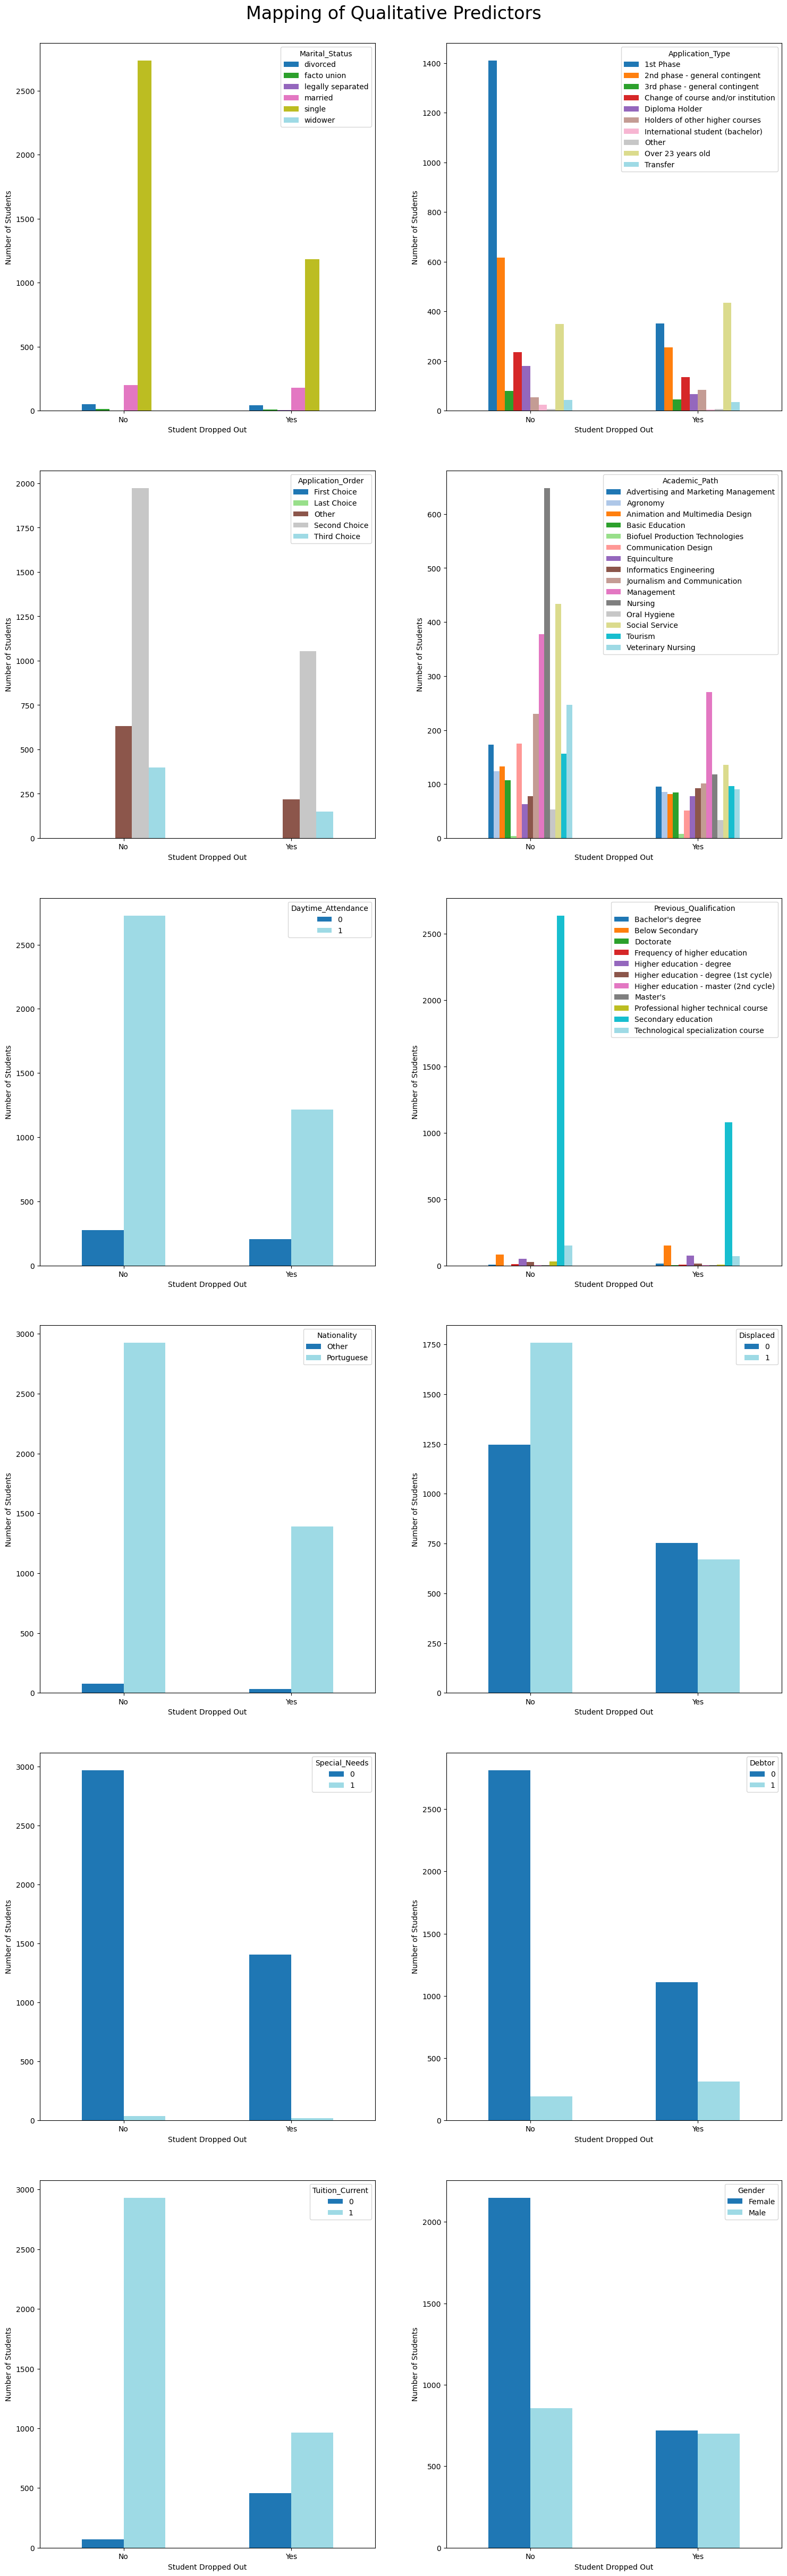

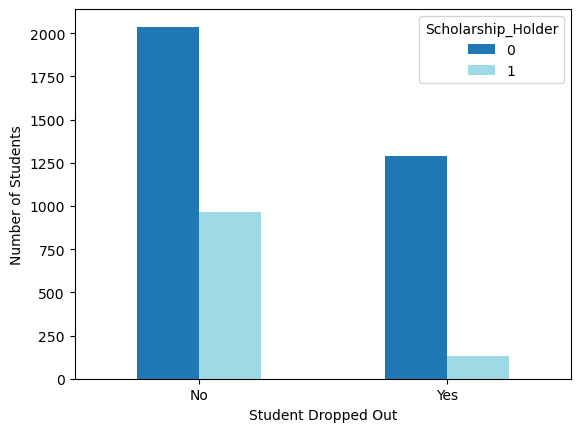

In [29]:
# plot the qualitative predictors
fig, axes = plt.subplots(6, 2, figsize = (16, 50))

maritalStatus.plot(kind = 'bar', stacked = False, colormap = 'tab20', ax = axes[0,0]).set(xticklabels = ['No', 'Yes'])
axes[0,0].tick_params(axis='x', rotation=0)
applicationType.plot(kind = 'bar', stacked = False, colormap = 'tab20', ax = axes[0,1]).set(xticklabels = ['No', 'Yes'])
axes[0,1].tick_params(axis='x', rotation=0)
applicationOrder.plot(kind = 'bar', stacked = False, colormap = 'tab20', ax = axes[1,0]).set(xticklabels = ['No', 'Yes'])
axes[1,0].tick_params(axis='x', rotation=0)
academicPath.plot(kind = 'bar', stacked = False, colormap = 'tab20', ax = axes[1,1]).set(xticklabels = ['No', 'Yes'])
axes[1,1].tick_params(axis='x', rotation=0)
daytimeAttendance.plot(kind = 'bar', stacked = False, colormap = 'tab20', ax = axes[2,0]).set(xticklabels = ['No', 'Yes'])
axes[2,0].tick_params(axis='x', rotation=0)
previousQualification.plot(kind = 'bar', stacked = False, colormap = 'tab20', ax = axes[2,1]).set(xticklabels = ['No', 'Yes'])
axes[2,1].tick_params(axis='x', rotation=0)
nationality.plot(kind = 'bar', stacked = False, colormap = 'tab20', ax = axes[3,0]).set(xticklabels = ['No', 'Yes'])
axes[3,0].tick_params(axis='x', rotation=0)
displaced.plot(kind = 'bar', stacked = False, colormap = 'tab20', ax = axes[3,1]).set(xticklabels = ['No', 'Yes'])
axes[3,1].tick_params(axis='x', rotation=0)
specialNeeds.plot(kind = 'bar', stacked = False, colormap = 'tab20', ax = axes[4,0]).set(xticklabels = ['No', 'Yes'])
axes[4,0].tick_params(axis='x', rotation=0)
debtor.plot(kind = 'bar', stacked = False, colormap = 'tab20', ax = axes[4,1]).set(xticklabels = ['No', 'Yes'])
axes[4,1].tick_params(axis='x', rotation=0)
tuition.plot(kind = 'bar', stacked = False, colormap = 'tab20', ax = axes[5,0]).set(xticklabels = ['No', 'Yes'])
axes[5,0].tick_params(axis='x', rotation=0)
gender.plot(kind = 'bar', stacked = False, colormap = 'tab20', ax = axes[5,1]).set(xticklabels = ['No', 'Yes'])
axes[5,1].tick_params(axis='x', rotation=0)


for index in range(-6,0):
    plt.setp(axes[index, :], xlabel = "Student Dropped Out", ylabel = "Number of Students")

fig.suptitle("Mapping of Qualitative Predictors", fontsize = 24)
fig.tight_layout(pad= 5)
scholarship.plot(kind = 'bar', stacked = False, colormap = 'tab20').set(xticklabels = ['No', 'Yes'], xlabel = "Student Dropped Out", ylabel = "Number of Students")
plt.xticks(rotation = 0, ha = "center")


plt.show()

From the plots above, we can see when it comes to debtors, more students that are not a debtor dropped out compared to ones that are. Furthermore, in the gender breakdown, the distribution of students that dropped out is uniform unlike the the distribution of students that didn't dropout. There are more females that didn't drop out compared to males. Lastly, when it comes to comparing by scholarship status, the majority of students that dropped out were not a scholarship holder.

In [30]:
# export the altered dataset
studentsData.to_csv("data_altered.csv", index = False)